In [187]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

### Pregunta 0
¿Qué robot tarda menos de media en inspeccionar un Trasto?

In [188]:
df_a = pandas.read_csv("robot_A.csv")
print("Media en inspeccionar del robot A: {0} min.".format(df_a['minutes'].mean()))

df_b = pandas.read_csv("robot_B.csv")
print("Media en inspeccionar del robot B: {0} min.".format(df_b['minutes'].mean()))

Media en inspeccionar del robot A: 9.785915175088867 min.
Media en inspeccionar del robot B: 6.5666829403453155 min.


### Pregunta 1

¿Cómo podemos representar visualmente los datos para sacar conclusiones útiles? Usa el notebook.

#### Histogramas

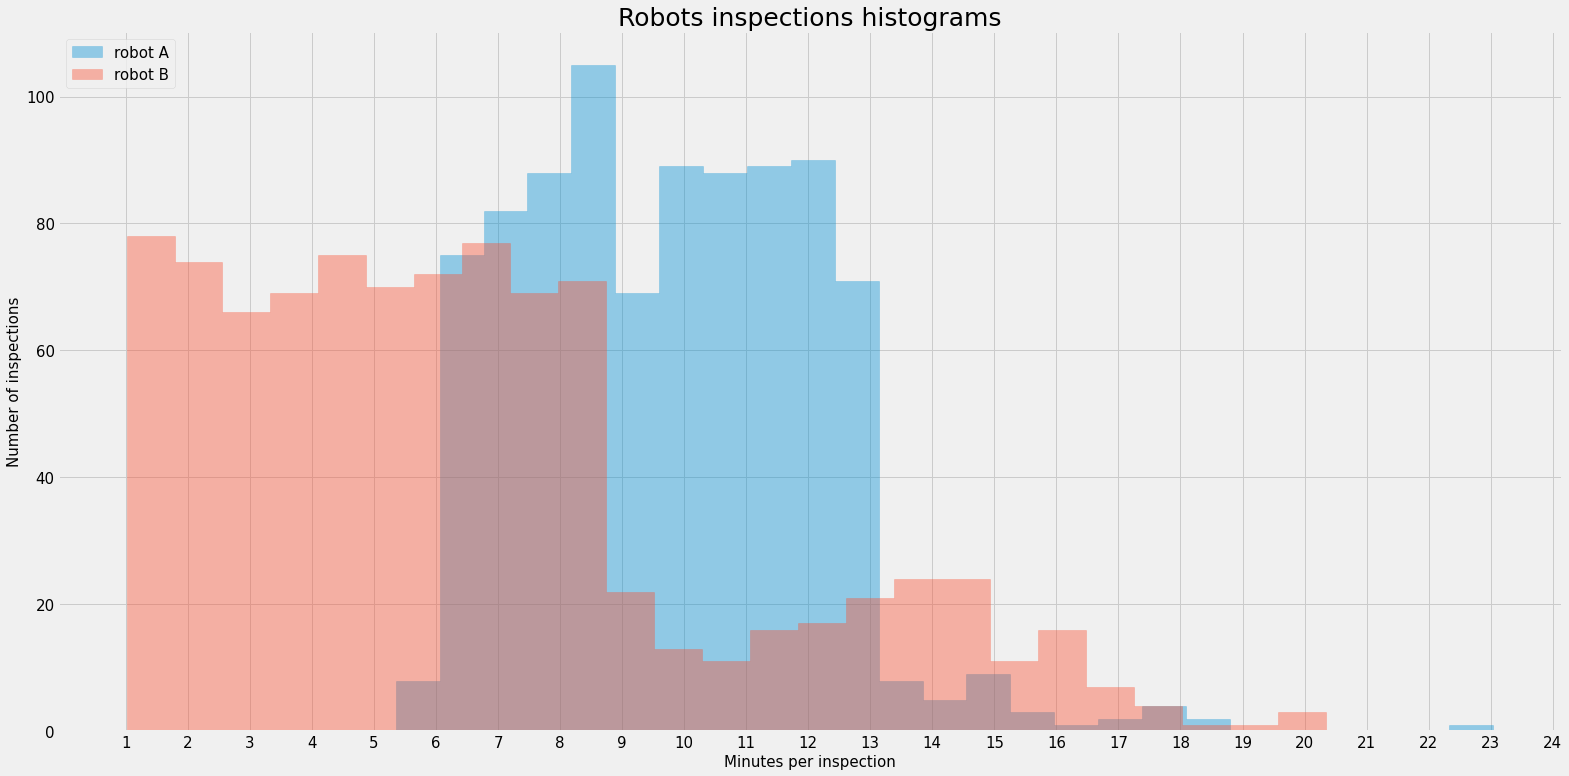

In [189]:
df_a = pandas.read_csv("robot_A.csv")
df_b = pandas.read_csv("robot_B.csv")

plt.figure(figsize=(24, 12))

plt.hist(df_a['minutes'], bins=25, fill=True, histtype='step', alpha=0.4, label="robot A")
plt.hist(df_b['minutes'], bins=25, fill=True, histtype='step', alpha=0.4, label="robot B")

plt.title('Robots inspections histograms',fontsize=25)
plt.legend(prop={'size': 15})
plt.xlabel('Minutes per inspection', fontsize=15)
plt.xticks(range(1,25), fontsize=15)
plt.ylabel('Number of inspections', fontsize=15)
plt.yticks(fontsize=15)

_ = plt.show()

#### Box plots

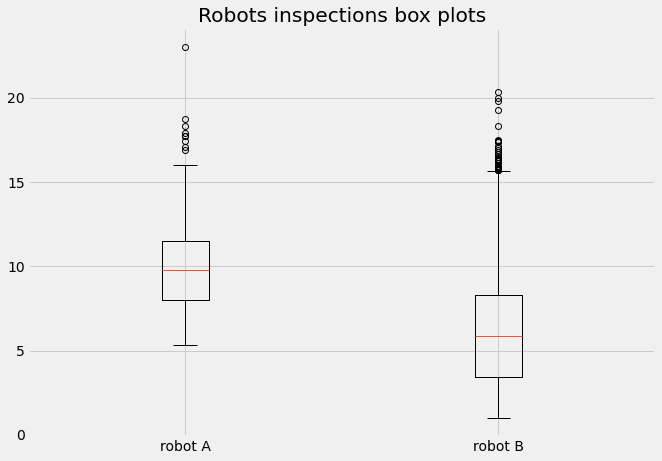

In [190]:
df_a = pandas.read_csv("robot_A.csv")
df_b = pandas.read_csv("robot_B.csv")

fig = plt.figure(figsize =(10, 7))

plt.boxplot([df_a['minutes'], df_b['minutes']])

plt.title("Robots inspections box plots")
plt.xticks([1, 2], ['robot A', 'robot B'])

_ = plt.show() 

### Pregunta 2

¿Qué robot debemos de comprar para llevar a cabo las inspecciones de Trastos minimizando costes de producción?

In [191]:
def probability_of_exceeding_13_min(inspections: List) -> float:
    more_than_13: List = []
    
    for i in inspections:
        if i > 13:
            more_than_13.append(1)
        else:
            more_than_13.append(0)
    
    return sum(more_than_13)/len(inspections)

df_a = pandas.read_csv("robot_A.csv")
df_b = pandas.read_csv("robot_B.csv")

print(probability_of_exceeding_13_min(list(df_a['minutes'])))
print(probability_of_exceeding_13_min(list(df_b['minutes'])))

0.04049493813273341
0.10964912280701754


Respuesta: `robot A`

Tanto en los **histogramas** como en los **box plots** podemos observar que el **robot A** es más lento inspeccionando, pero el número de inspecciones que superan los 13 minutos es menor que el del **robot B**. Por lo tanto la probabilidad de tener que volver a pagar el **coste del calentamiento** es menor con el **robot A**.

### Pregunta 3

* ¿Cuál es el coste medio de fabricación por Trasto si usamos inspectores humanos que *siempre* tardan más de 20 minutos en inspeccionar un Trasto? Una inspección humana también cuesta 5 euros.
* ¿Cuál es el coste medio de fabricación por Trasto si usamos el robot A?
* ¿Cuál es el coste medio de fabricación por Trasto si usamos el robot B?

In [192]:
HEATING_COST = 1000
FORGING_COST = 10
INSPECTION_COST = 5

def production_costs(costs: List, need_heating: bool, need_heating_prob: float) -> float:
    if need_heating:
        costs.append(HEATING_COST)
    
    costs.append(FORGING_COST)
    costs.append(INSPECTION_COST)
    
    if np.random.random() <= 0.2:
        if np.random.random() <= need_heating_prob:
            need_heating = True
        else:
            need_heating = False
            
        return production_costs(costs, need_heating, need_heating_prob)
    else:
        return sum(costs)

def average_production_costs(num_trials: int, need_heating_prob: float) -> float:
    euros: List[float] = []
        
    for i in range(num_trials):
        euros.append(production_costs([], True, need_heating_prob))
    
    return sum(euros)/len(euros)
    

def estimate_production_costs(need_heating_prob: float) -> Tuple[float, float]:
    experiment: List[float] = []

    for i in range(10):
        estimated_expected_costs = average_production_costs(10000, need_heating_prob)
        experiment.append(estimated_expected_costs)

    experiment = np.array(experiment)
    experiment_mean = experiment.mean()
    experiment_std = experiment.std()

    return (experiment_mean, experiment_std)


experiment_mean, experiment_std = estimate_production_costs(need_heating_prob=1.0000)
print("Coste medio de producción con inspección humana: {0:.4f}€ ± {1:.4f}€".format(experiment_mean, experiment_std))


experiment_mean, experiment_std = estimate_production_costs(need_heating_prob=0.0404)
print("Coste medio de producción con inspección robot A: {0:.4f}€ ± {1:.4f}€".format(experiment_mean, experiment_std))


experiment_mean, experiment_std = estimate_production_costs(need_heating_prob=0.1096)
print("Coste medio de producción con inspección robot B: {0:.4f}€ ± {1:.4f}€".format(experiment_mean, experiment_std))

Coste medio de producción con inspección humana: 1269.4605€ ± 3.9405€
Coste medio de producción con inspección robot A: 1029.0168€ ± 0.6579€
Coste medio de producción con inspección robot B: 1046.4449€ ± 1.0990€
